<a href="https://colab.research.google.com/github/luiseduchede/estudo-ds/blob/main/estudo_aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [3]:
#limpando alguns dados

limpo = dados
limpo["Valor"] = dados["Valor"].str.split(expand = True)[1]
limpo["Valor"] = limpo["Valor"].str.replace(".","").astype(int)
limpo = limpo[(limpo["Valor"] >= 100000)]
limpo = limpo[(~limpo["Rua"].isnull())]
limpo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000


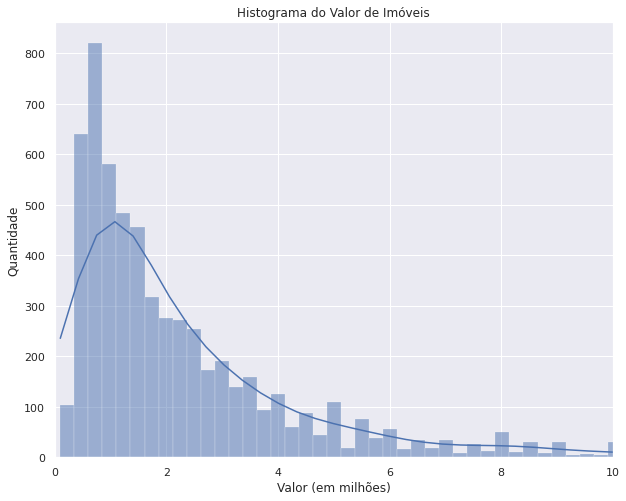

In [16]:
#Exercício 1 - Criar uma escala de valores em milhões
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = limpo, x = "Valor", kde = True)
ax.set_title("Histograma do Valor de Imóveis")
ax.set_xticks([0, 2000000, 4000000, 6000000, 8000000,  10000000])
ax.set_xticklabels([0, 2, 4, 6, 8, 10])
ax.set_xlabel("Valor (em milhões)")
ax.set_ylabel("Quantidade")
plt.xlim((-50, 10000000))
plt.show()

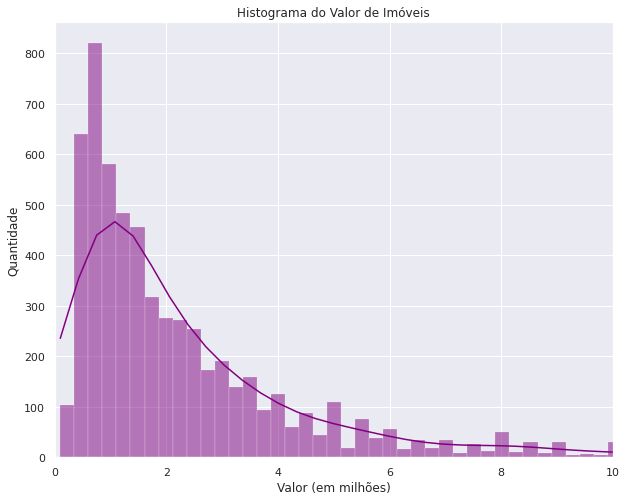

In [21]:
#Exercício 2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = limpo, x = "Valor", kde = True, color = "purple")
ax.set_title("Histograma do Valor de Imóveis")
ax.set_xticks([0, 2000000, 4000000, 6000000, 8000000,  10000000])
ax.set_xticklabels([0, 2, 4, 6, 8, 10])
ax.set_xlabel("Valor (em milhões)")
ax.set_ylabel("Quantidade")
plt.xlim((-50, 10000000))
plt.show()

In [29]:
#3 - Preço do metro quadrado por bairro e plotar em um gráfico ideal

ex = dados.groupby("Bairro")["Metragem"].mean()
ex = ex.to_frame()
ex

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


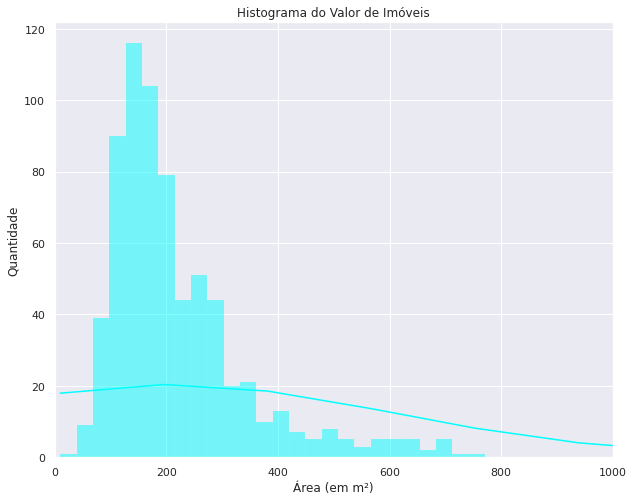

In [39]:
#3.1 - Gráfico

plt.figure(figsize=(10, 8))
ax = sns.histplot(data = ex, x = "Metragem", kde = True, color = "cyan")
ax.set_title("Histograma do Valor de Imóveis")
ax.set_xticks([0, 200, 400, 600,  800, 1000])
ax.set_xlabel("Área (em m²)")
ax.set_ylabel("Quantidade")
plt.xlim((0, 1000))
plt.show()